In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/NCsbWMnuCqc", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/NCsbWMnuCqc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
from _easy_qiskit_init import *

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

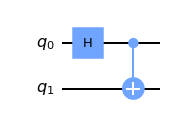

In [4]:
qc.draw(output='mpl')

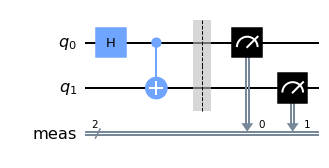

In [5]:
qc.measure_all()
qc.draw(output='mpl')

In [6]:
simulator = QasmSimulator()

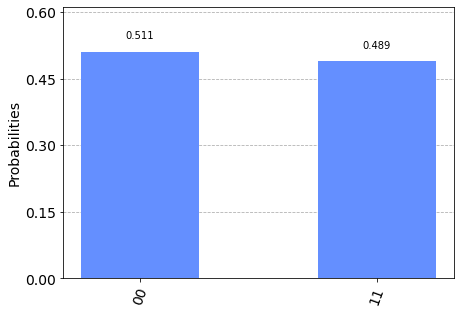

In [7]:
job = simulator.run(qc)
res = job.result()
counts = res.get_counts()
ph(counts)

In [8]:
qr = QuantumRegister(2, name='qubit')
cr = ClassicalRegister(2, name = 'bit')

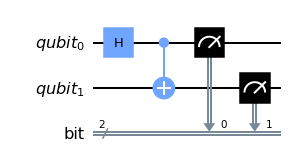

In [9]:
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
qc.draw(output='mpl')

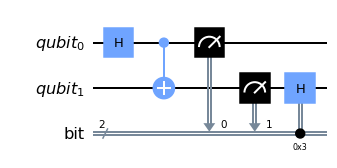

In [10]:
qc.h(qr[1]).c_if(cr, 3)
qc.draw(output='mpl')

In [11]:
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

In [12]:
teleport = QuantumCircuit(tq, tc0, tc1, tc2)
teleport.h(tq[1])
teleport.cx(tq[1], tq[2])
teleport.ry(pi/4, tq[0])
teleport.cx(tq[0], tq[1])
teleport.h(tq[0])
teleport.barrier()

In [13]:
teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

In [14]:
teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

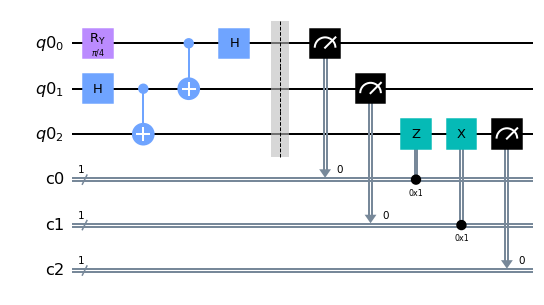

In [15]:
teleport.measure(tq[2], tc2[0])
teleport.draw(output='mpl')